Processing walking.jpg...


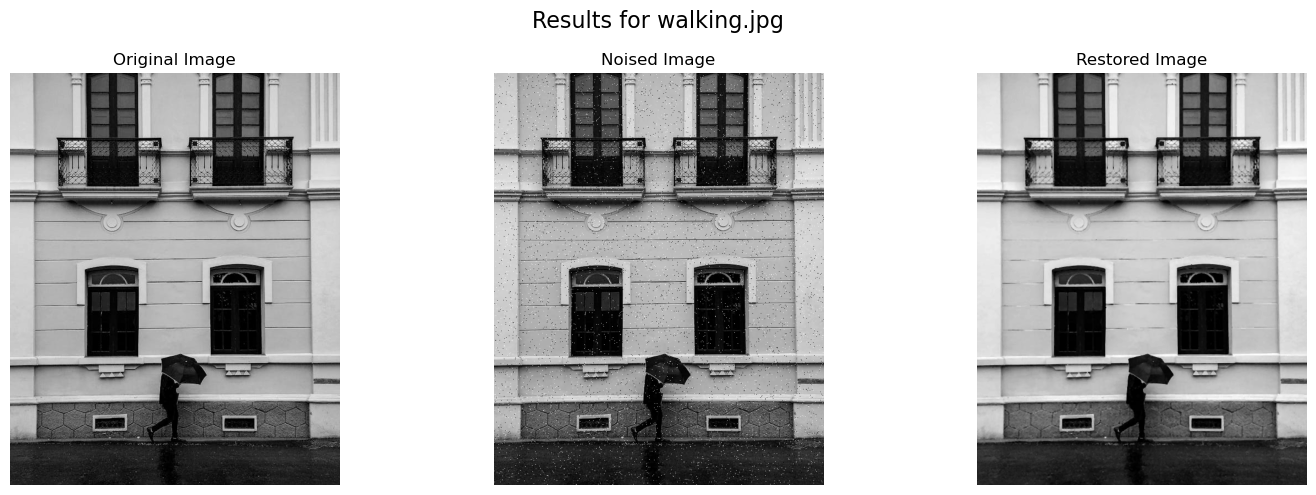

PSNR: 26.57
SSIM: 0.8704
MSE: 143.18
Processing NYC.jpg...


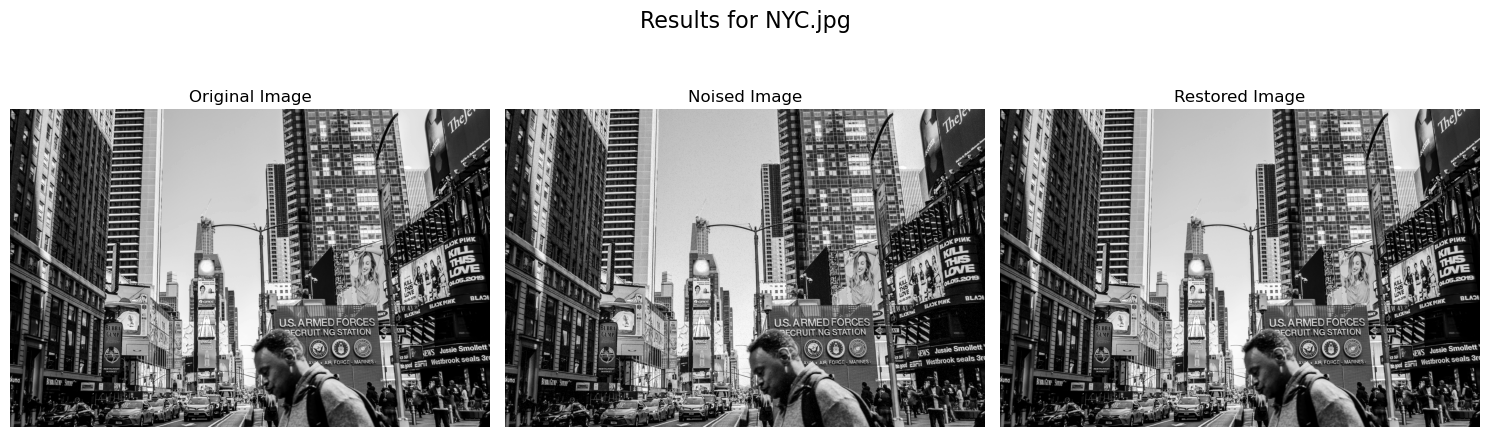

PSNR: 30.42
SSIM: 0.9194
MSE: 58.97
Processing ship.jpg...


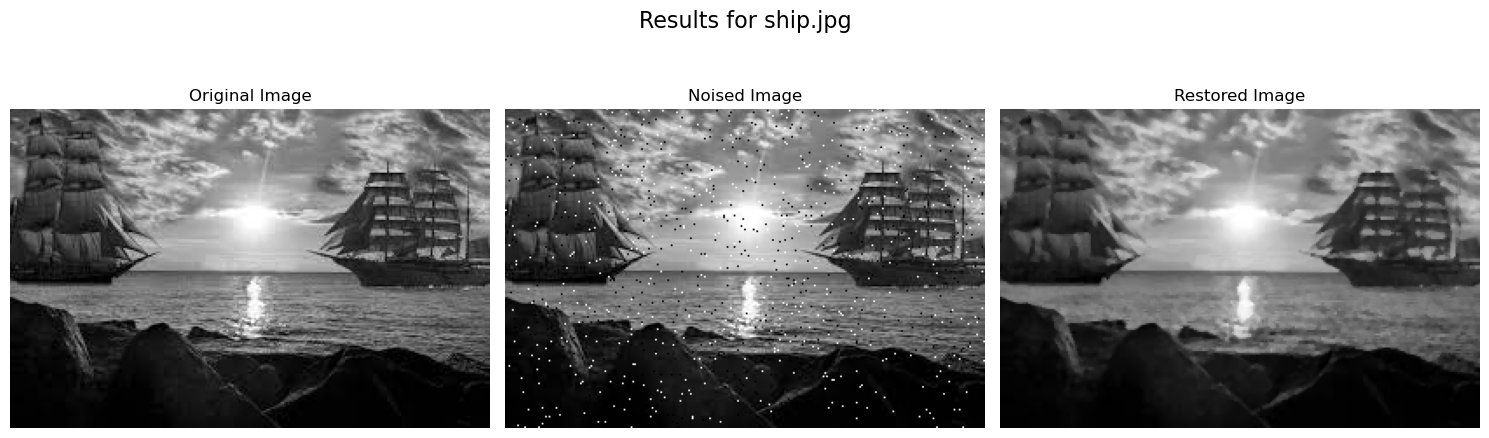

PSNR: 27.21
SSIM: 0.8496
MSE: 123.74

Summary of Results:
Image          PSNR      SSIM      MSE       
---------------------------------------------
walking.jpg    26.57     0.8704    143.18    
NYC.jpg        30.42     0.9194    58.97     
ship.jpg       27.21     0.8496    123.74    


In [80]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim, mean_squared_error as mse
from scipy.ndimage import median_filter

# Define a list of image paths
image_files = ["walking.jpg", "NYC.jpg", "ship.jpg"]  # image filenames

# Function to process an image
def process_image(image_path, noise_amount=0.02, filter_size=3):
    """
    Processes a single image by adding salt-and-pepper noise and applying median filtering.
    :param image_path: Path to the image file.
    :param noise_amount: Proportion of salt-and-pepper noise to add.
    :param filter_size: Size of the median filter kernel.
    :return: Original image, noised image, restored image, and quality metrics.
    """
    # Load image and convert to grayscale
    image = io.imread(image_path, as_gray=True)
    image = (image * 255).astype(np.uint8)
    
    # Add salt-and-pepper noise
    noised_image = util.random_noise(image, mode='s&p', amount=noise_amount)
    noised_image = (noised_image * 255).astype(np.uint8)
    
    # Apply median filter
    restored_image = median_filter(noised_image, size=filter_size)
    
    # Calculate quality metrics
    psnr_value = psnr(image, restored_image)
    ssim_value = ssim(image, restored_image)
    mse_value = mse(image, restored_image)
    
    return image, noised_image, restored_image, psnr_value, ssim_value, mse_value

# Process each image in the list
results = []
for img_file in image_files:
    try:
        print(f"Processing {img_file}...")
        original, noised, restored, psnr_val, ssim_val, mse_val = process_image(img_file)
        results.append((img_file, psnr_val, ssim_val, mse_val))
        
        # Display results for this image
        plt.figure(figsize=(15, 5))
        plt.suptitle(f"Results for {img_file}", fontsize=16)
        
        plt.subplot(1, 3, 1)
        plt.title("Original Image")
        plt.imshow(original, cmap='gray')
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.title("Noised Image")
        plt.imshow(noised, cmap='gray')
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.title("Restored Image")
        plt.imshow(restored, cmap='gray')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Print metrics
        print(f"PSNR: {psnr_val:.2f}")
        print(f"SSIM: {ssim_val:.4f}")
        print(f"MSE: {mse_val:.2f}")
    except Exception as e:
        print(f"Failed to process {img_file}: {e}")

# Display summary of results
# Display summary of results with proper alignment
print("\nSummary of Results:")
print(f"{'Image':<15}{'PSNR':<10}{'SSIM':<10}{'MSE':<10}")
print("-" * 45)
for img_file, psnr_val, ssim_val, mse_val in results:
    print(f"{img_file:<15}{psnr_val:<10.2f}{ssim_val:<10.4f}{mse_val:<10.2f}")